In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np   # 배열 사용할 때 numpy
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(512, 512, 3)


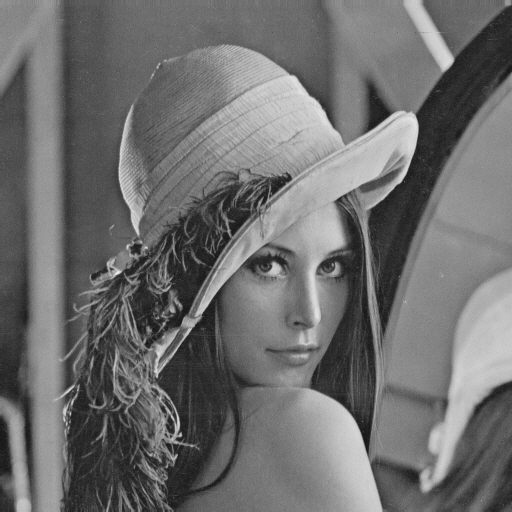

In [2]:
img = cv2.imread('/content/gdrive/My Drive/images/lena.jpg')
print(img.shape)
gimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gimg)

로버츠 검출기

In [5]:
gx = np.array([[-1, 0], [0, 1]], dtype=int)
gy = np.array([[0, -1], [1, 0]], dtype=int)

In [8]:
gx = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=int)
gy = np.array([[0, 0, -1], [0, 1, 0], [0, 0, 0]], dtype=int)

소벨 검출기

In [26]:
gx = np.array([[-1, 0, 0], [-2, 0, 2], [-1, 0, 1]], dtype=int)
gy = np.array([[1, 2, 1], [0, 1, 0], [-1, -2, -1]], dtype=int)

프리윗 검출기

In [27]:
gx = np.array([[-1, 0, 0], [-1, 0, 1], [-1, 0, 1]], dtype=int)
gy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

에지 검출

In [9]:
x = cv2.filter2D(gimg, -1, gx)
y = cv2.filter2D(gimg, -1, gy)

In [12]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

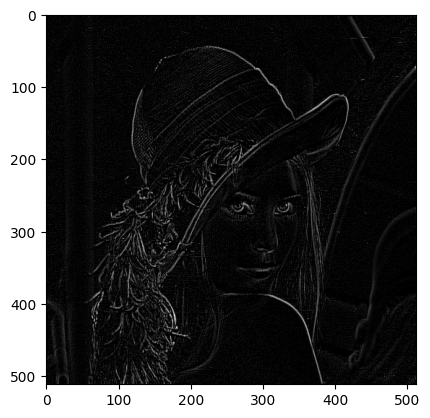

In [14]:
outimg = cv2.addWeighted(absX, 1, absY, 1, 0)
plt.imshow(outimg, cmap='gray')
#plt.show()

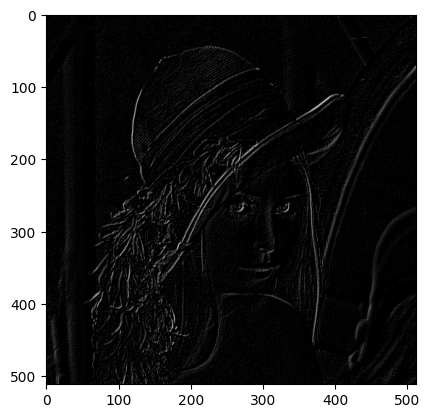

In [15]:
plt.imshow(absX, cmap='gray')
#plt.show()

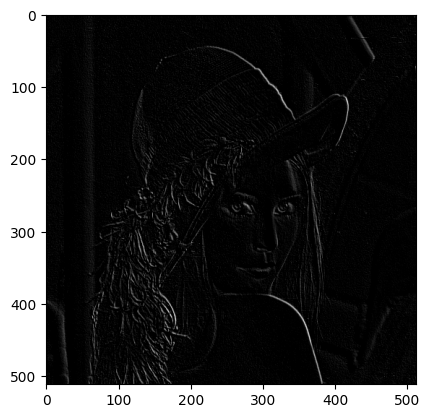

In [16]:
plt.imshow(absY, cmap='gray')

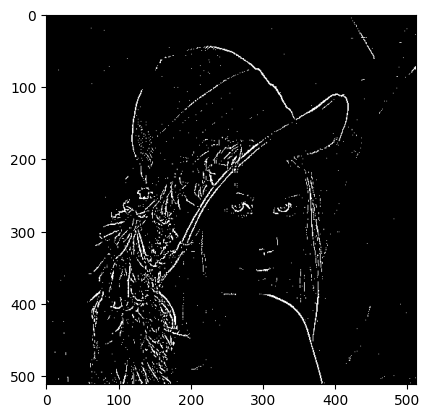

In [29]:
gBin = np.zeros(gimg.shape, dtype=int)

threshold = 40

for i in range(gimg.shape[0]):
  for j in range(gimg.shape[1]):
    if outimg[i, j] > threshold:
      gBin[i, j] = 255

plt.imshow(gBin, cmap='gray')

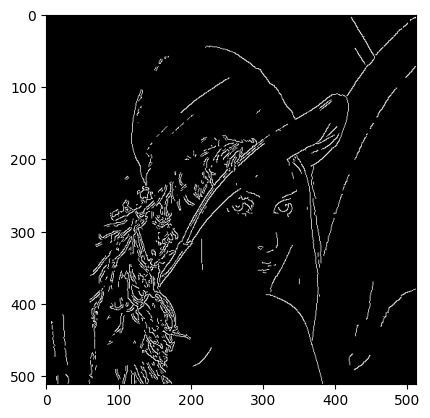

In [34]:
outimg = cv2.Canny(gimg, 200, 250)
plt.imshow(outimg, cmap='gray')